In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

names = ['id', 'api', 'count', 'res_time_sum', 'res_time_min', 'res_time_max', 'res_time_avg', 'interval', 'created_at']
data = pd.read_csv('./log.txt',sep='\t',names=names)
data.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2017-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2017-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2017-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2017-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2017-11-01 00:04:07


In [3]:
data.tail()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
179491,13438800,/front-api/bill/create,11,2783.48,99.24,489.90,253.0,60,2018-05-30 23:06:21
179492,13438866,/front-api/bill/create,10,1951.10,85.37,529.51,195.0,60,2018-05-30 23:07:21
179493,13438917,/front-api/bill/create,3,494.17,103.95,211.47,164.0,60,2018-05-30 23:08:21
179494,13438981,/front-api/bill/create,9,1798.28,101.11,433.30,199.0,60,2018-05-30 23:09:21
179495,13439086,/front-api/bill/create,6,1017.97,74.45,298.97,169.0,60,2018-05-30 23:10:21


In [4]:
df = pd.DataFrame(data)
df.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2017-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2017-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2017-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2017-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2017-11-01 00:04:07


In [5]:
df.tail()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
179491,13438800,/front-api/bill/create,11,2783.48,99.24,489.90,253.0,60,2018-05-30 23:06:21
179492,13438866,/front-api/bill/create,10,1951.10,85.37,529.51,195.0,60,2018-05-30 23:07:21
179493,13438917,/front-api/bill/create,3,494.17,103.95,211.47,164.0,60,2018-05-30 23:08:21
179494,13438981,/front-api/bill/create,9,1798.28,101.11,433.30,199.0,60,2018-05-30 23:09:21
179495,13439086,/front-api/bill/create,6,1017.97,74.45,298.97,169.0,60,2018-05-30 23:10:21


In [6]:
df2 = df.duplicated()

In [7]:
# 重复值数量为0
len(df2[df2==True])

0

In [8]:
q_upper = df['res_time_avg'].quantile(0.75) #上4分位数
q_upper

202.0

In [9]:
q_lower = df['res_time_avg'].quantile(0.25) #下4分位数
q_lower

144.0

In [10]:
k = 3

In [11]:
d = df[(df['res_time_avg'] > q_upper+k*(q_upper-q_lower)) | (df['res_time_avg'] < q_lower-k*(q_upper-q_lower))] # 大于上4分位数或者小于下4分位数
d
# 这些都是异常值

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
88,171464,/front-api/bill/create,1,424.30,424.30,424.30,424.0,60,2017-11-01 02:11:07
341,196912,/front-api/bill/create,10,4391.19,117.96,1211.31,439.0,60,2017-11-01 15:10:09
355,198117,/front-api/bill/create,11,5689.44,150.16,3693.68,517.0,60,2017-11-01 15:24:09
545,215229,/front-api/bill/create,8,3175.42,68.81,2097.52,396.0,60,2017-11-01 18:34:09
546,215331,/front-api/bill/create,6,14384.97,93.03,7628.88,2397.0,60,2017-11-01 18:35:09
917,248396,/front-api/bill/create,1,511.32,511.32,511.32,511.0,60,2017-11-02 00:48:09
1780,328401,/front-api/bill/create,1,1366.30,1366.30,1366.30,1366.0,60,2017-11-03 00:54:11
1840,335332,/front-api/bill/create,1,996.18,996.18,996.18,996.0,60,2017-11-03 08:52:13
2684,408368,/front-api/bill/create,1,764.54,764.54,764.54,764.0,60,2017-11-04 01:19:13
2706,409987,/front-api/bill/create,1,378.86,378.86,378.86,378.0,60,2017-11-04 01:45:13


In [12]:
# 异常值有4308个


In [13]:
df['api'].unique()

array(['/front-api/bill/create'], dtype=object)

In [14]:
df['interval'].unique()
# interval 这一行与其他数据没有相关性

array([60], dtype=int64)

In [15]:
# api和interval 的值只有一种，所以与其他数据没有相关性，所以可以丢弃
df = df.drop('api',axis=1)
df = df.drop('interval',axis=1)


In [16]:
t = pd.to_datetime(df.created_at)
df.index = t
# df = df.set_index('created_at')
df.tail()

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,,
2018-05-30 23:06:21,13438800,11,2783.48,99.24,489.90,253.0,2018-05-30 23:06:21
2018-05-30 23:07:21,13438866,10,1951.10,85.37,529.51,195.0,2018-05-30 23:07:21
2018-05-30 23:08:21,13438917,3,494.17,103.95,211.47,164.0,2018-05-30 23:08:21
2018-05-30 23:09:21,13438981,9,1798.28,101.11,433.30,199.0,2018-05-30 23:09:21
2018-05-30 23:10:21,13439086,6,1017.97,74.45,298.97,169.0,2018-05-30 23:10:21


In [58]:
df_count = df.groupby(df.index.hour).mean()
df_count

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg
created_at,,,,,,
0,6.856837e+06,3.304614,639.268466,131.116595,276.765055,188.529991
1,6.880160e+06,1.690119,299.231564,153.462484,202.914776,175.489486
2,6.770700e+06,1.162311,204.817215,173.097662,184.628900,178.325997
3,6.986980e+06,1.077253,182.886180,172.186867,175.539099,173.283262
4,7.179317e+06,1.137931,166.429655,145.244138,154.626207,149.396552
5,9.130307e+06,1.160000,196.267200,171.603200,183.040400,176.840000
6,1.082598e+07,1.000000,182.925625,182.925625,182.925625,182.562500
7,1.048131e+07,1.000000,237.177500,237.177500,237.177500,236.800000
8,9.563027e+06,1.027027,194.346486,192.069189,192.911622,191.972973


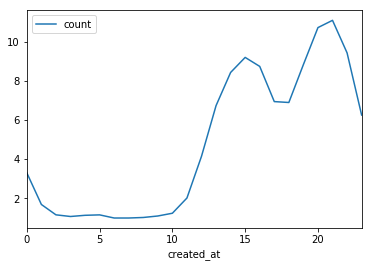

In [59]:
# 6. 分析api调⽤次数情况，例如，在⼀天中，哪些时间是访问⾼峰，哪些时间段访问⽐较少，如下
# 图所示，从凌晨2点到11点访问少，业务⾼峰出在现下午两三点，晚上⼋九点
df_count.plot(y=['count'])
plt.show()

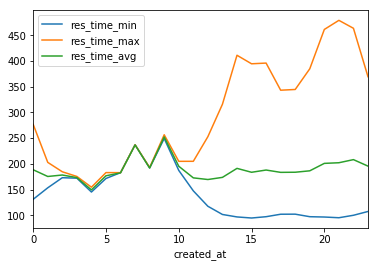

In [30]:
# 7. 分析⼀天中api响应时间，如下图所示，可以看到在业务⾼峰时间段，最⼤响应时间和平均响应
# 时间都有所上升
df_count.plot(y=['res_time_min', 'res_time_max', 'res_time_avg'])
plt.show()

In [46]:
# 8. 分析连续的⼏天数据，可以发现，每天的业务⾼峰时段都⽐较相似
# df_count = df.groupby(df.index.date)
# df_count.tail()

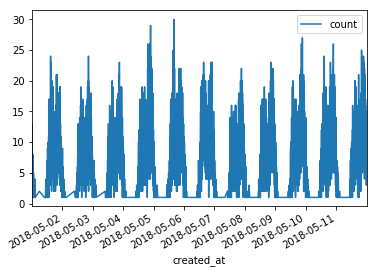

In [75]:
df['2018-05-01':'2018-05-11'].plot(y=['count'])
plt.show()

In [108]:
# 9. 分析周末访问量是否有增加。如下图，可以发现，周末的下午和晚上，⽐⾮周末访问量多⼀些
df_weekend = df.groupby(df.index.date)
# 周末的数据
没思路了
